In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
C_D = pd.read_csv("Company_Data.csv")
C_D

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
pd.set_option("display.max_rows",None)

In [5]:
C_D

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [6]:
C_D.shape

(400, 11)

In [7]:
label_encoder = preprocessing.LabelEncoder()
C_D["ShelveLoc"] = label_encoder.fit_transform(C_D["ShelveLoc"])
C_D['Urban'] = label_encoder.fit_transform(C_D['Urban'])
C_D['US'] = label_encoder.fit_transform(C_D['US'])

In [8]:
C_D.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
cd=pd.DataFrame(C_D)
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
5,10.81,124,113,13,501,72,0,78,16,0,1
6,6.63,115,105,0,45,108,2,71,15,1,0
7,11.85,136,81,15,425,120,1,67,10,1,1
8,6.54,132,110,0,108,124,2,76,10,0,0
9,4.69,132,113,0,131,124,2,76,17,0,1


In [10]:
row_index=cd[cd['Sales'] < 10].index
row_index1=(cd[cd['Sales'] >= 10]).index

In [11]:
cd.loc[row_index,'Sales']='Yes'
cd.loc[row_index1,'Sales']='No'

In [21]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Yes,138,73,11,276,120,0,42,17,1,1
1,No,111,48,16,260,83,1,65,10,1,1
2,No,113,35,10,269,80,2,59,12,1,1
3,Yes,117,100,4,466,97,2,55,14,1,1
4,Yes,141,64,3,340,128,0,38,13,1,0
5,No,124,113,13,501,72,0,78,16,0,1
6,Yes,115,105,0,45,108,2,71,15,1,0
7,No,136,81,15,425,120,1,67,10,1,1
8,Yes,132,110,0,108,124,2,76,10,0,0
9,Yes,132,113,0,131,124,2,76,17,0,1


In [22]:
x = cd.drop("Sales",axis=1)
y = cd['Sales']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# Splitting the data into training and testing data set

In [24]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(167.4, 190.26, 'X[4] <= 89.5\nentropy = 0.763\nsamples = 280\nvalue = [62, 218]'),
 Text(83.7, 135.9, 'X[0] <= 99.5\nentropy = 0.96\nsamples = 34\nvalue = [21, 13]'),
 Text(41.85, 81.53999999999999, 'X[7] <= 17.5\nentropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[6] <= 65.5\nentropy = 0.779\nsamples = 26\nvalue = [20, 6]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.323\nsamples = 17\nvalue = [16, 1]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 6.5\nentropy = 0.65\nsamples = 246\nvalue = [41, 205]'),
 Text(209.25, 81.53999999999999, 'X[0] <= 135.5\nentropy = 0.337\nsamples = 128\nvalue = [8, 120]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.085\nsamples = 94\n

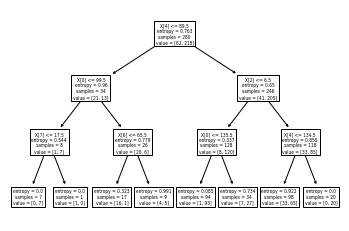

In [25]:
tree.plot_tree(model)

In [26]:
#Predicting
preds = model.predict(x_test)
pd.Series(preds).value_counts()

Yes    111
No       9
dtype: int64

In [27]:
pd.crosstab(y_test,preds) 

col_0,No,Yes
Sales,,
No,5,12
Yes,4,99


In [28]:
np.mean(preds==y_test)*100

86.66666666666667